In [52]:
import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm
import os
from scipy import stats

In [31]:
pf1 = hm.ParaFrame('cache/SPO/summ/SgrA_a{aspin:g}_i{inc:g}_f230.e9.tsv')
pf2 = hm.ParaFrame('cache/beta/summ/SgrA_a{aspin:g}_i{inc:g}_f230.e9_Rh40.tsv')

for k in set(pf1.keys()) - {'path'}:
    globals()[k] = np.unique(pf1[k])
    print(k, globals()[k][:16])

for k in set(pf2.keys()) - {'path'}:
    globals()[k] = np.unique(pf2[k])
    print(k, globals()[k][:16])


mode = ['SPO', 'RhRl']

inc [30.]
aspin [-0.94 -0.5   0.    0.5   0.94]
inc [30.]
aspin [-0.94 -0.5   0.    0.5   0.94]


In [45]:
text_dict = {
    'mavg': r'$m_{avg}$',
    'vavg': r'$v_{avg}$',
    'mnet': r'$m_{net}$',
    'vnet': r'$v_{net}$',
    'beta_2_amplitude': r'$\beta_2$', 
    'beta_2_phase': r"$\angle \beta_2$",
    'beta_1_amplitude': r'$\beta_1$', 
    'beta_1_phase': r"$\angle \beta_1$",
    'tauI': r"$\tau_I$", 
    'tauF': r"$\tau_F$"
}

In [ ]:
"""
Index(['time', 'time_hr', 'Mdot', 'Ladv', 'nuLnu', 'Ftot', 'Imin', 'Imax',
       'Imean', 'alpha0', 'beta0', 'major_FWHM', 'minor_FWHM', 'PA', 'mnet',
       'vnet', 'mavg', 'vavg', 'beta_2_amplitude', 'beta_2_phase',
       'beta_1_amplitude', 'beta_1_phase', 'tauI', 'tauF'],
      dtype='object')
"""

In [66]:
def getdist(path, dist):
    df = pd.read_csv(path, sep='\t')
    return df[dist].values

def vizrow(plot, dist):
    fig, ax = plt.subplots(1, 5, figsize=(18, 5), sharey=True) # Increased figsize for legend space, added sharey=True

    # Create dummy plot handles for the global legend
    # We plot very small, invisible points to get the labels for the legend
    h1, = ax[0].plot([], [], color='skyblue', label='SPO')
    h2, = ax[0].plot([], [], color='salmon', label='$R_{low}-R_{high}$')

    for a, spin in enumerate(aspin):
        data_set1 = getdist(pf1(aspin=spin).path.iloc[0], dist)
        data_set2 = getdist(pf2(aspin=spin).path.iloc[0], dist)

        plot(data_set1, data_set2, ax[a])
        ax[a].set_title(f'Spin: {spin}')


    # Create a single legend for the entire figure
    # fig.legend([h1, h2], ['SPO', '$R_{low}-R_{high}$'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)
    #fig.legend(handles=[h1, h2], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)

    plt.suptitle(text_dict[dist])
    plt.tight_layout() # Adjust layout to make space for the legend
    plt.show()

In [ ]:
def vizrow(plot, dist):
    fig, ax = plt.subplots(1, 5, figsize=(18, 5), sharey=True)

    h1, = ax[0].plot([], [], color='skyblue', label='SPO')
    h2, = ax[0].plot([], [], color='salmon', label='$R_{low}-R_{high}$')

    for a, spin in enumerate(aspin):
        data_set1 = getdist(pf1(aspin=spin).path.iloc[0], dist)
        data_set2 = getdist(pf2(aspin=spin).path.iloc[0], dist)

        plot(data_set1, data_set2, ax[a])
        ax[a].set_title(f'Spin: {spin}')


    # Create a single legend for the entire figure
    # fig.legend([h1, h2], ['SPO', '$R_{low}-R_{high}$'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)
    #fig.legend(handles=[h1, h2], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)

    plt.suptitle(text_dict[dist])
    plt.tight_layout() # Adjust layout to make space for the legend
    plt.show()

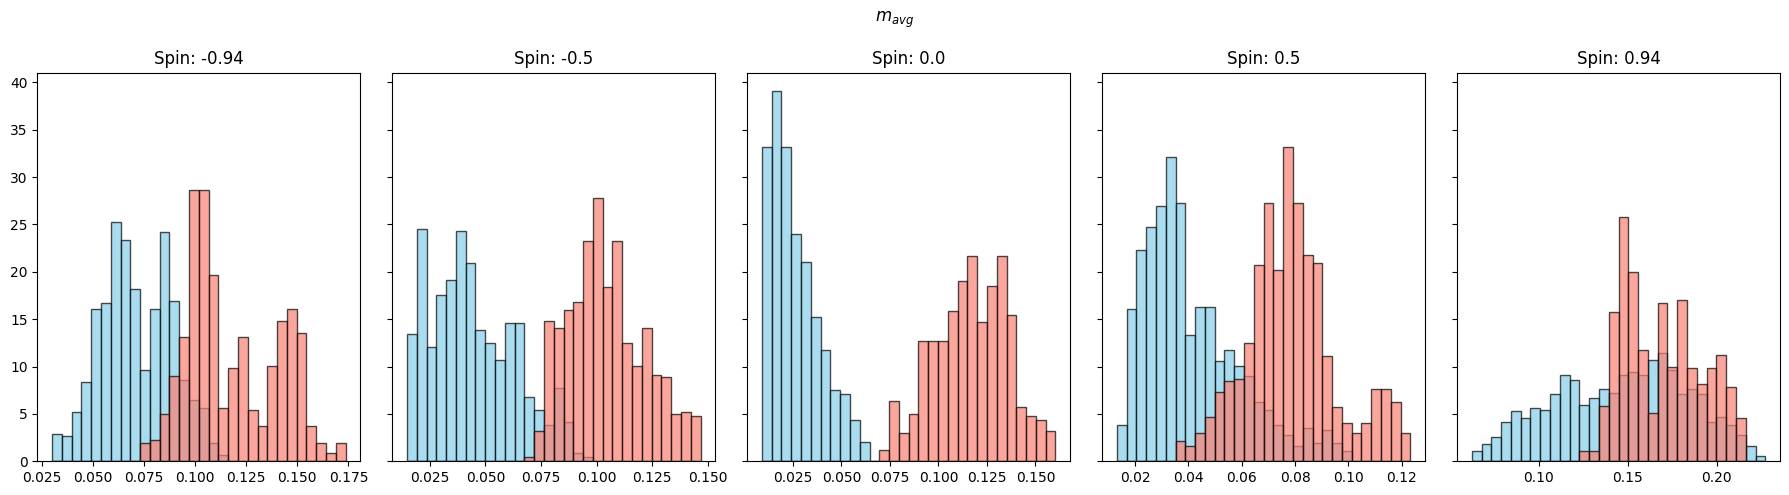

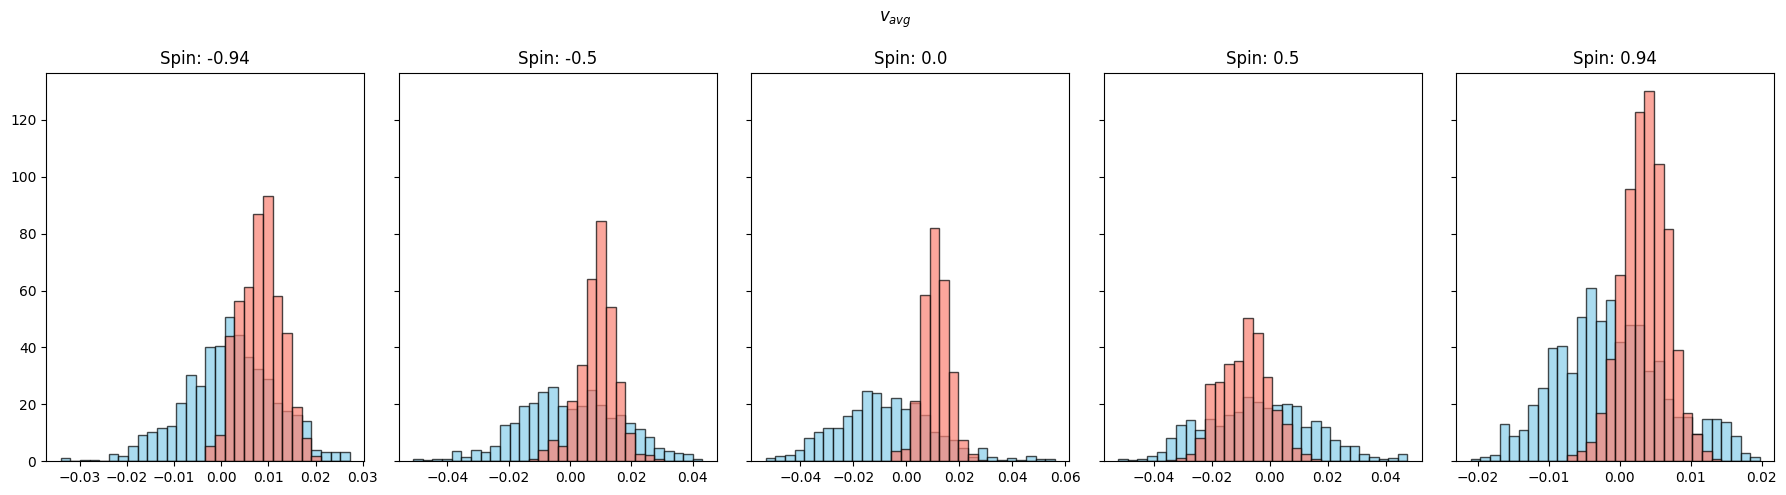

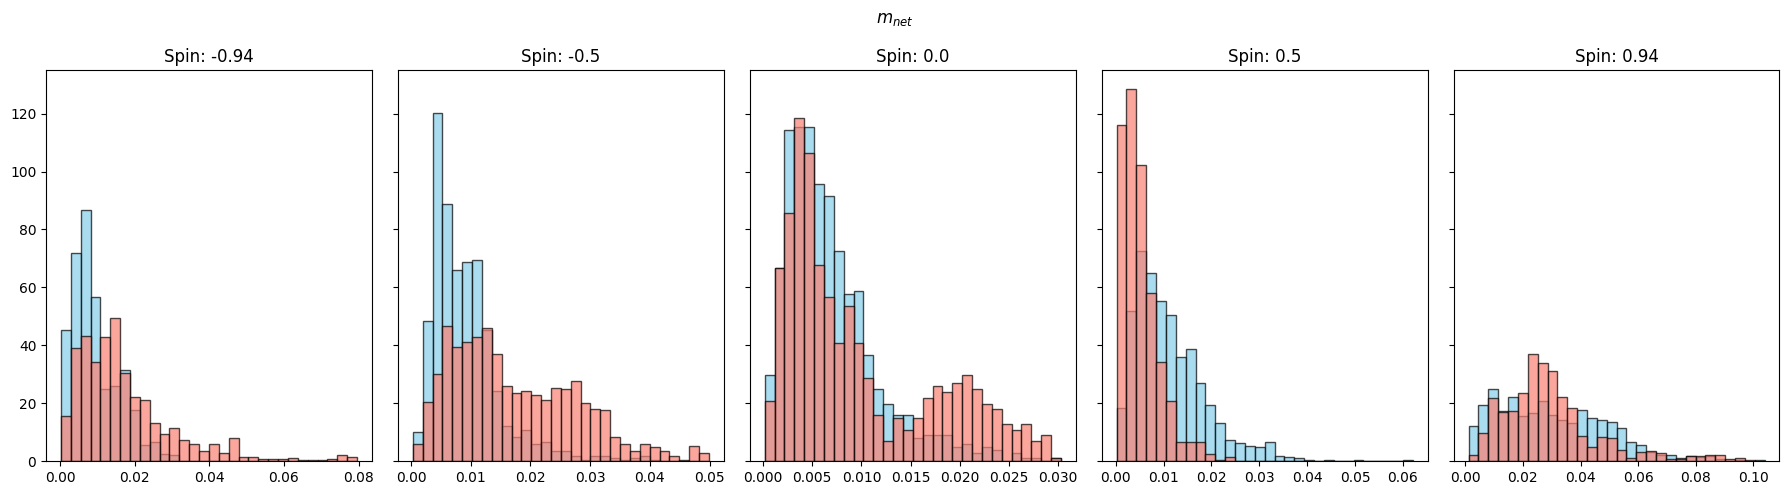

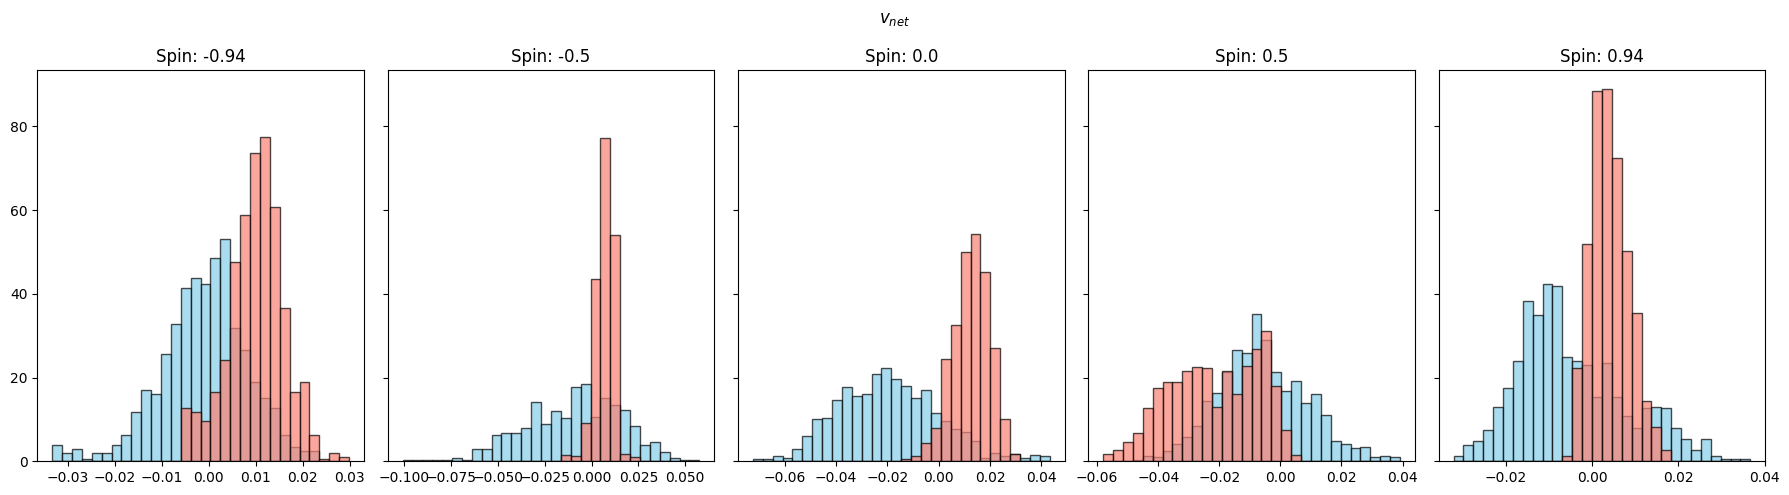

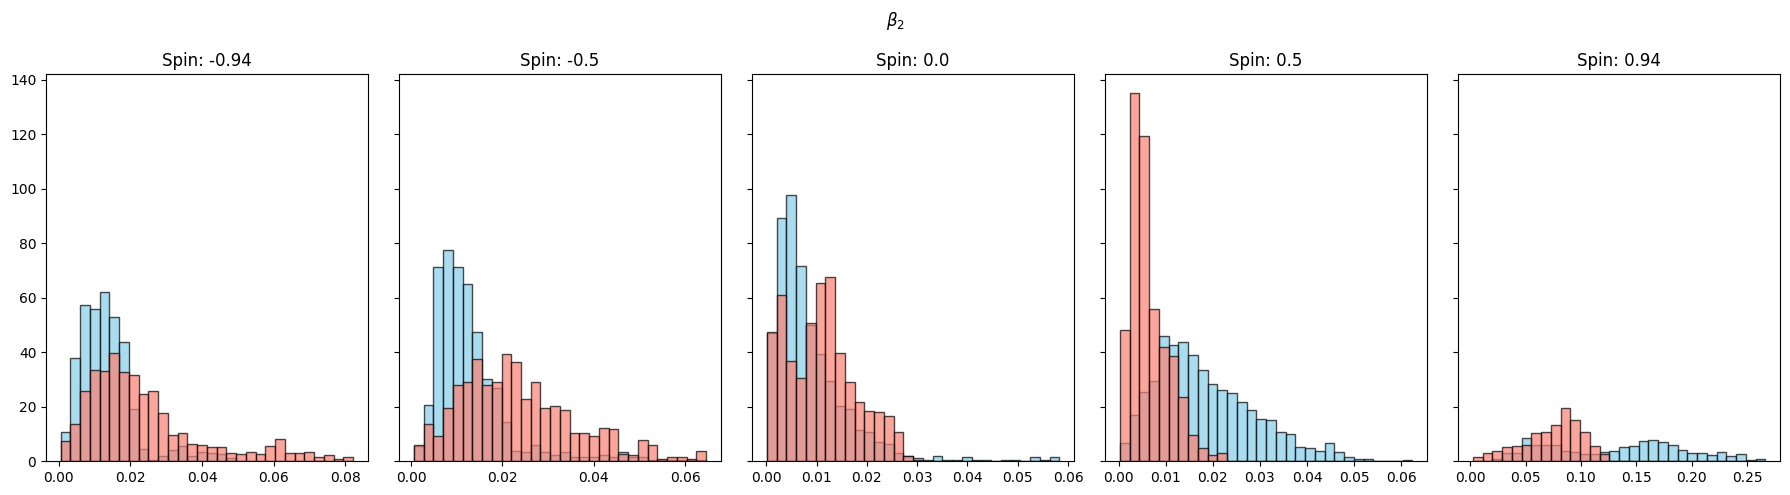

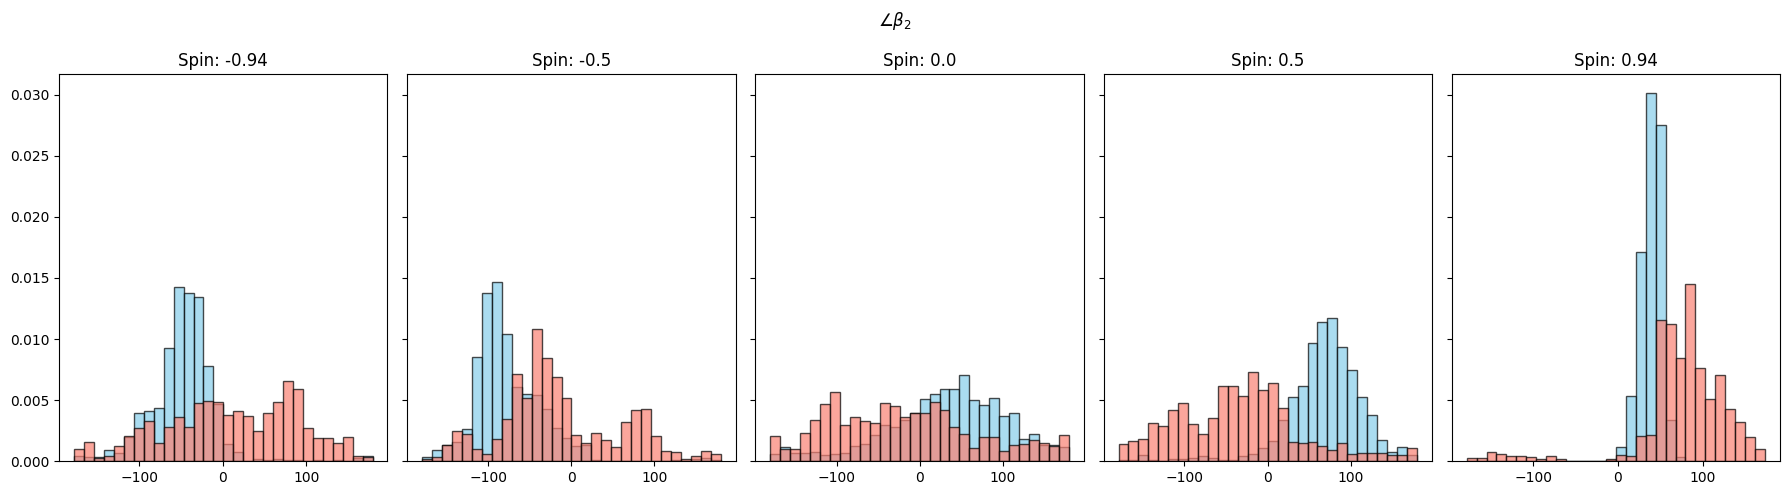

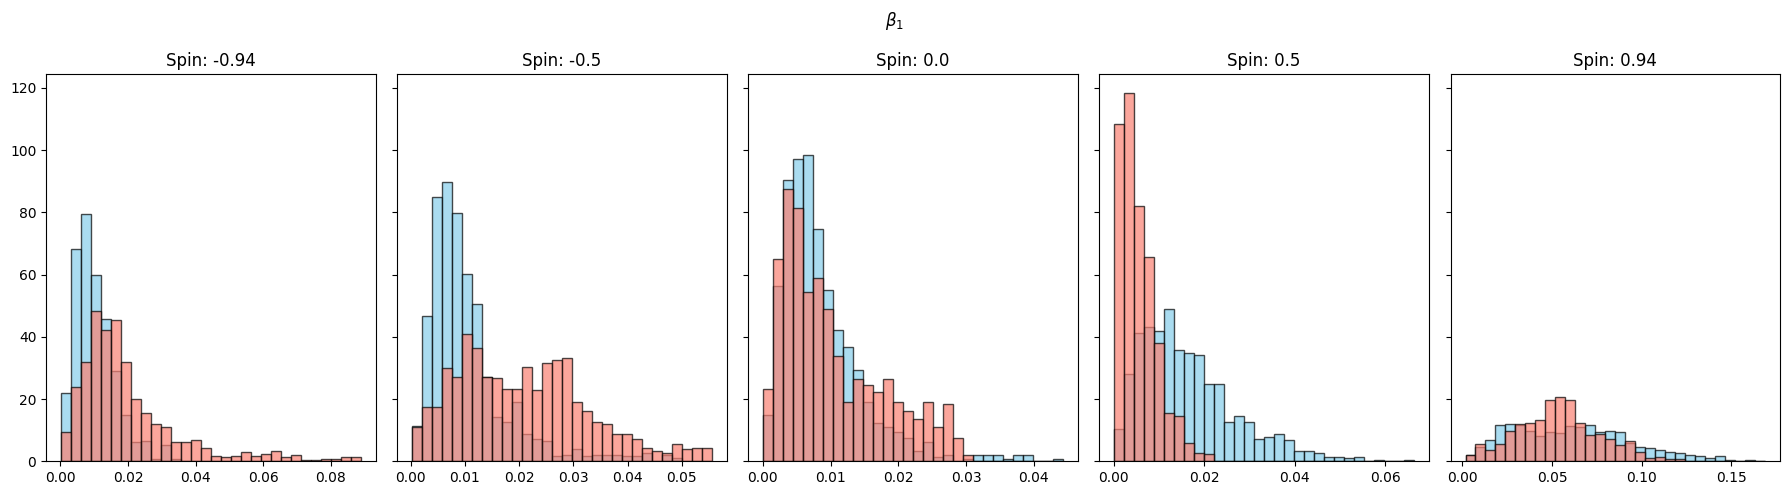

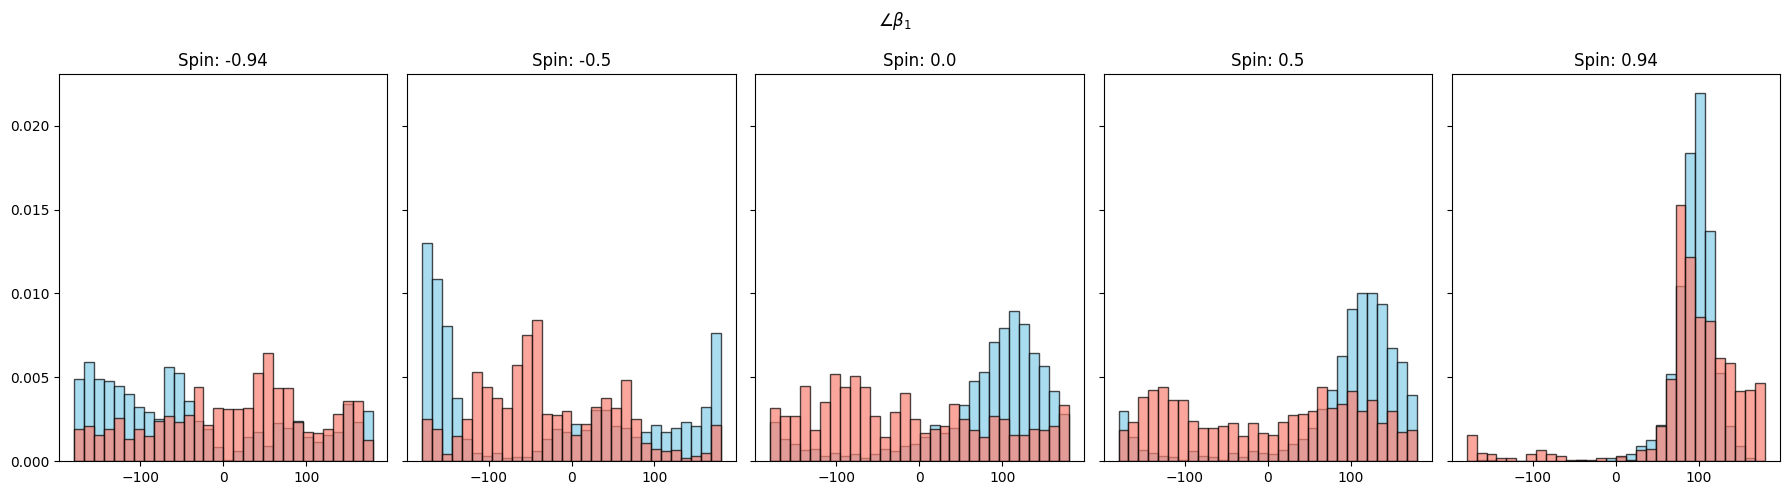

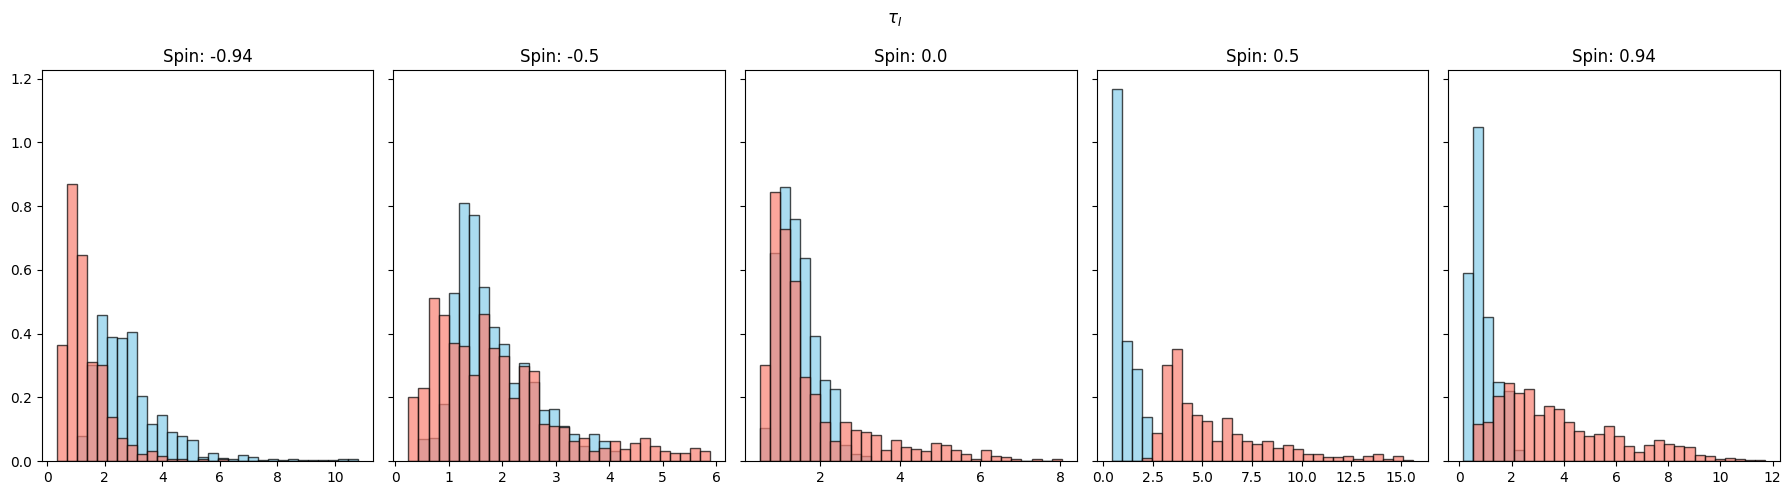

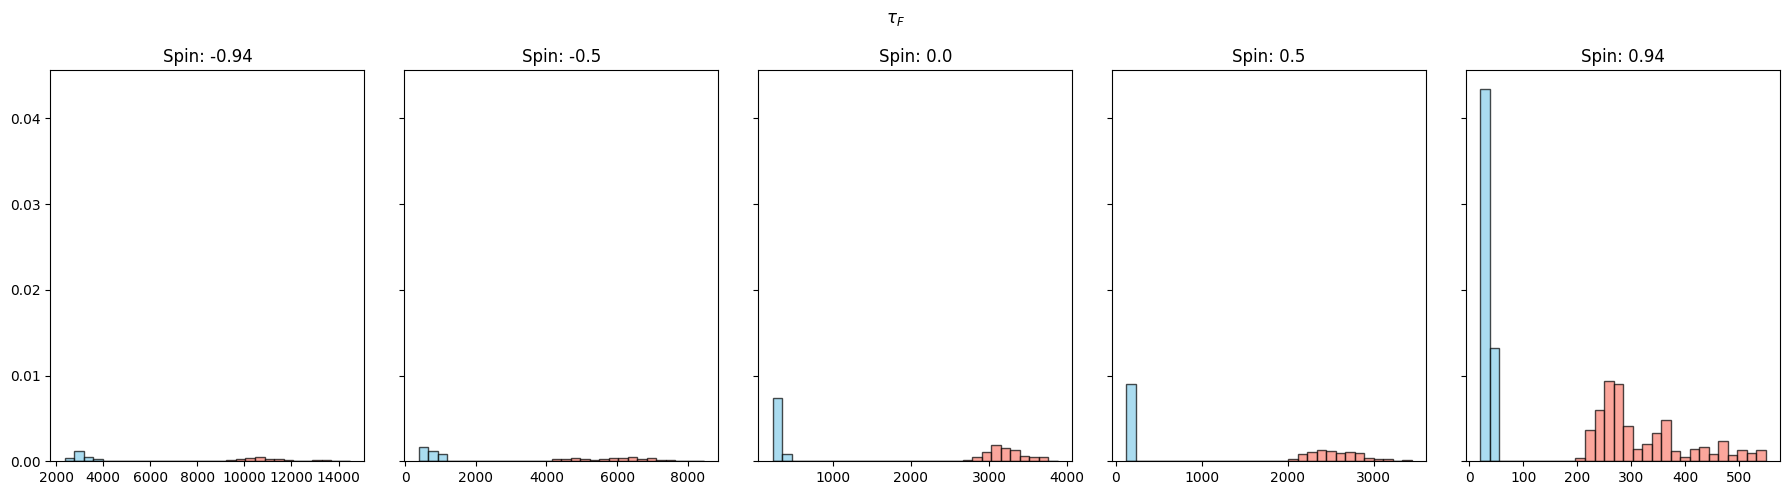

In [67]:
def plot_hist(data1, data2, ax):
    combined_data = np.hstack((data1, data2))

    num_bins = 30
    _, common_bins = np.histogram(combined_data, bins=num_bins)

    ax.hist(data1, bins=common_bins, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    ax.hist(data2, bins=common_bins, alpha=0.7, color='salmon', edgecolor='black', density=True)

    _, p_value = stats.ks_2samp(data1, data2)

    if p_value > 0.05:
        print(f'{dist} has a p-value of {p_value}')
    
for dist in text_dict:
    vizrow(plot_hist, dist)

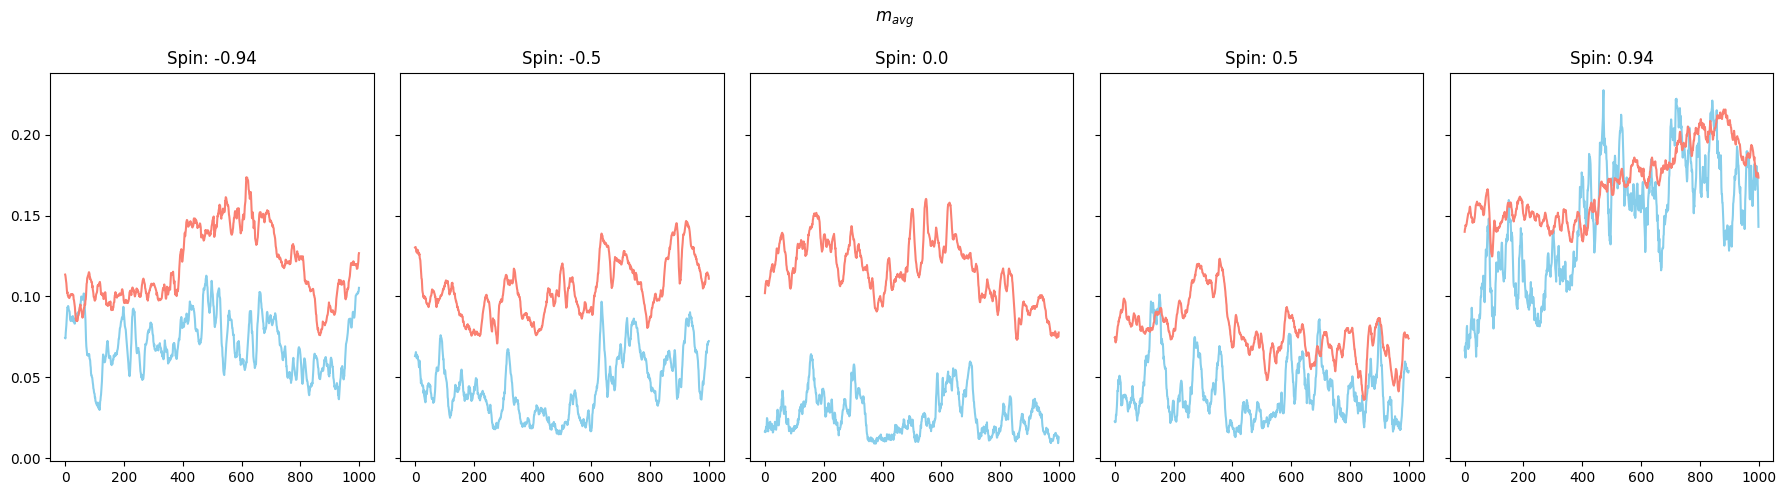

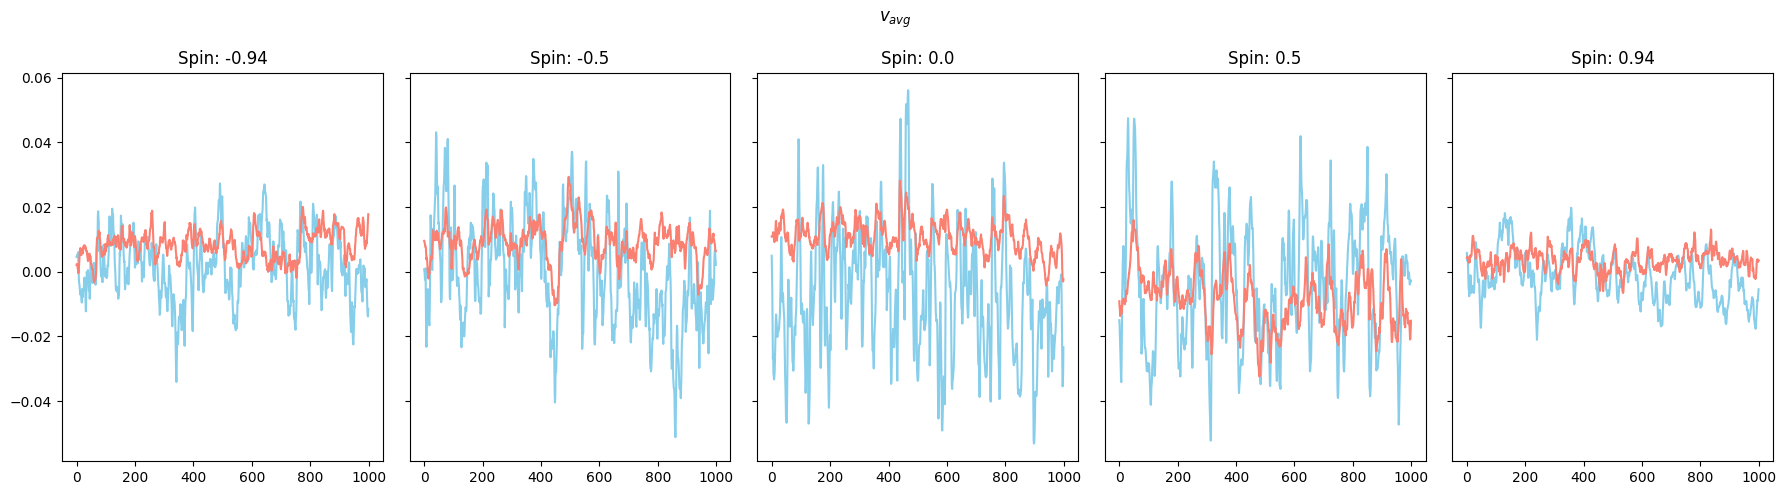

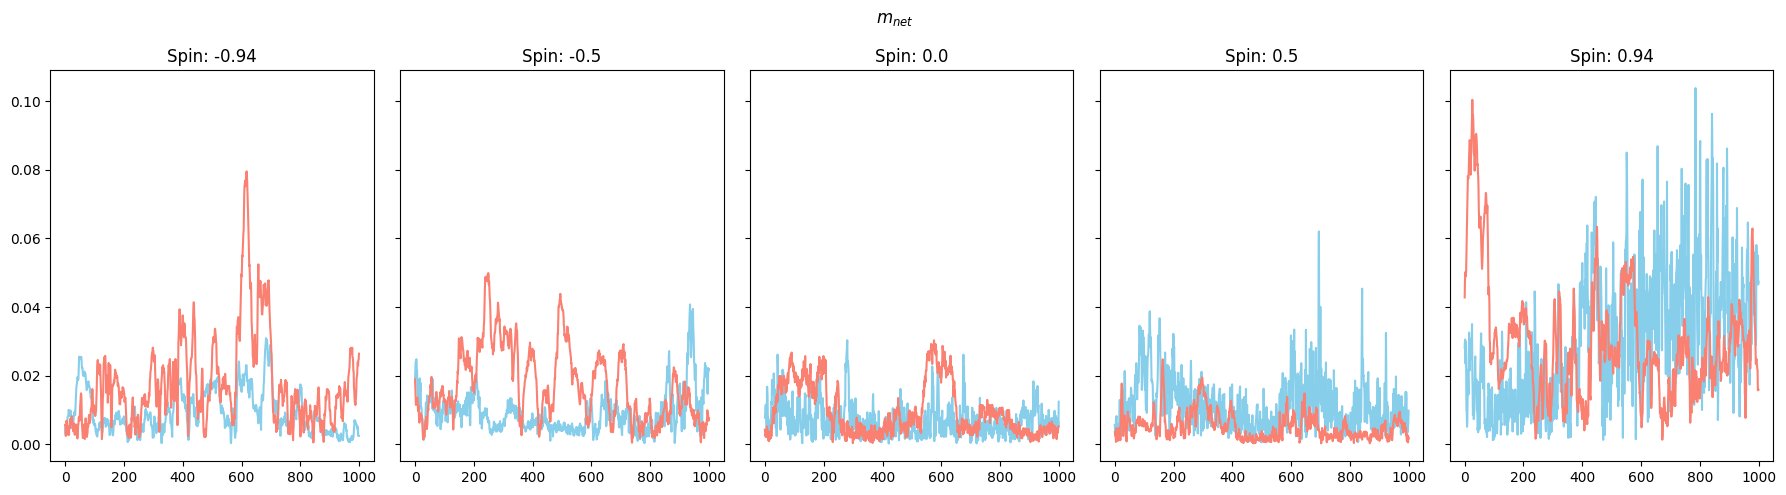

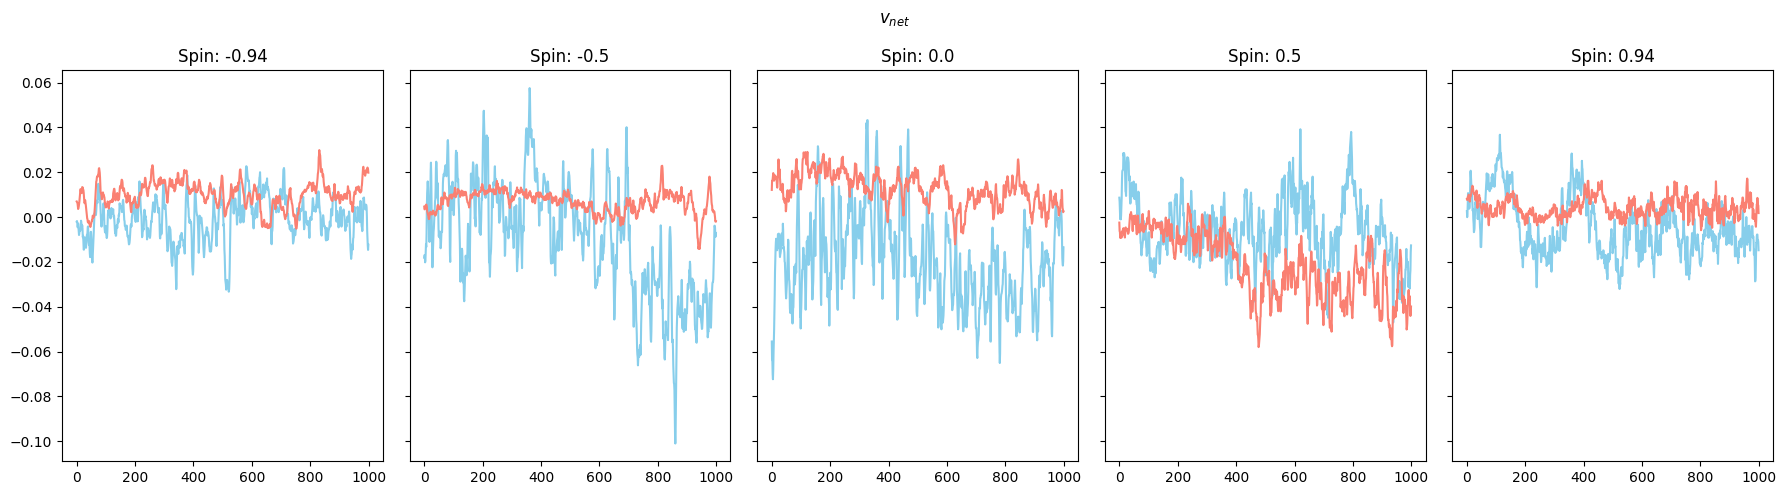

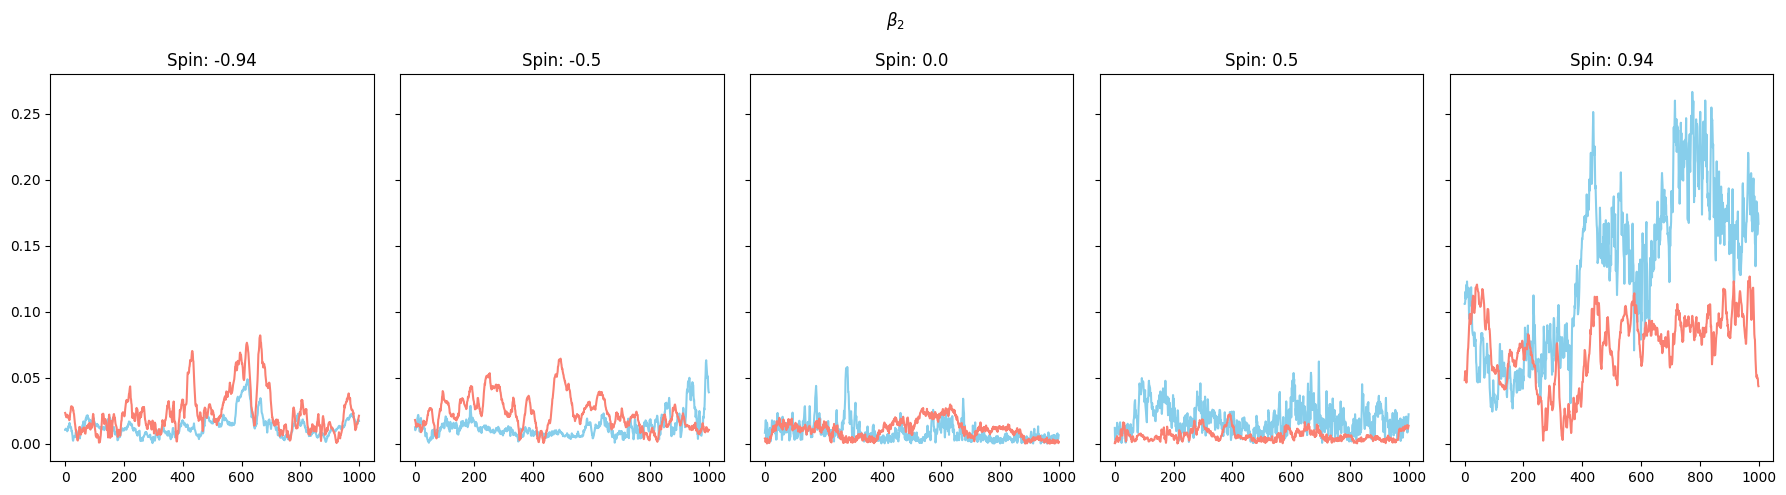

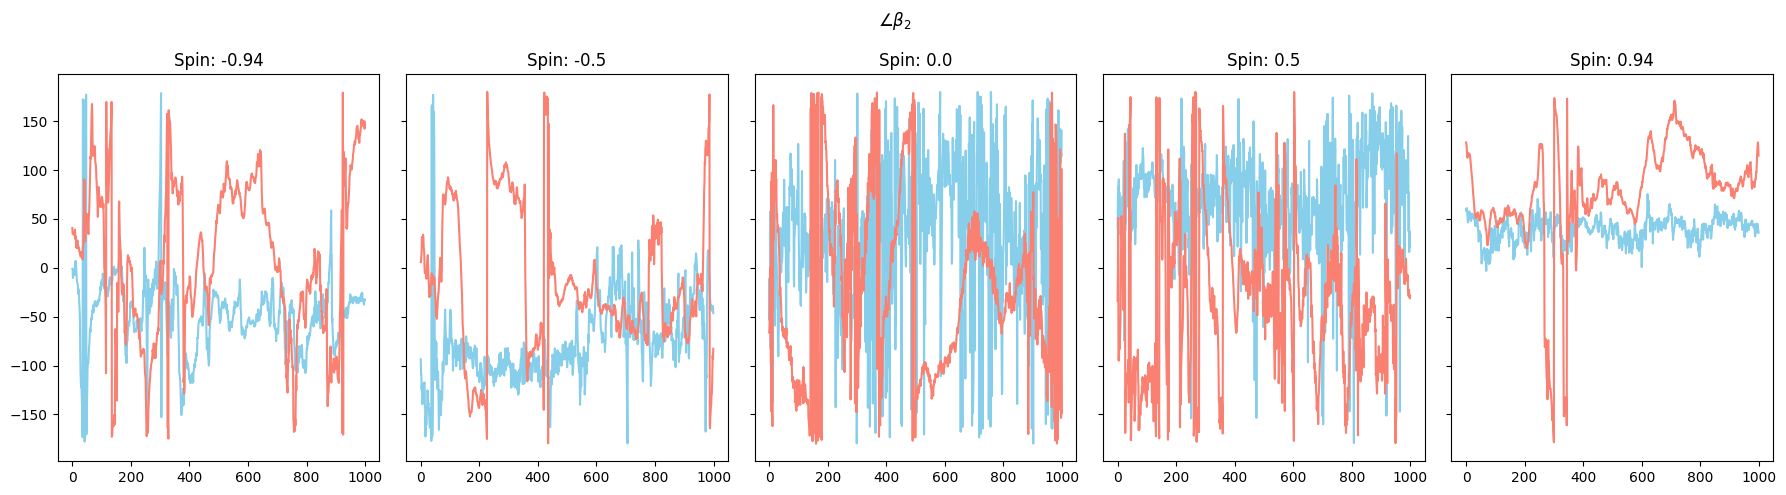

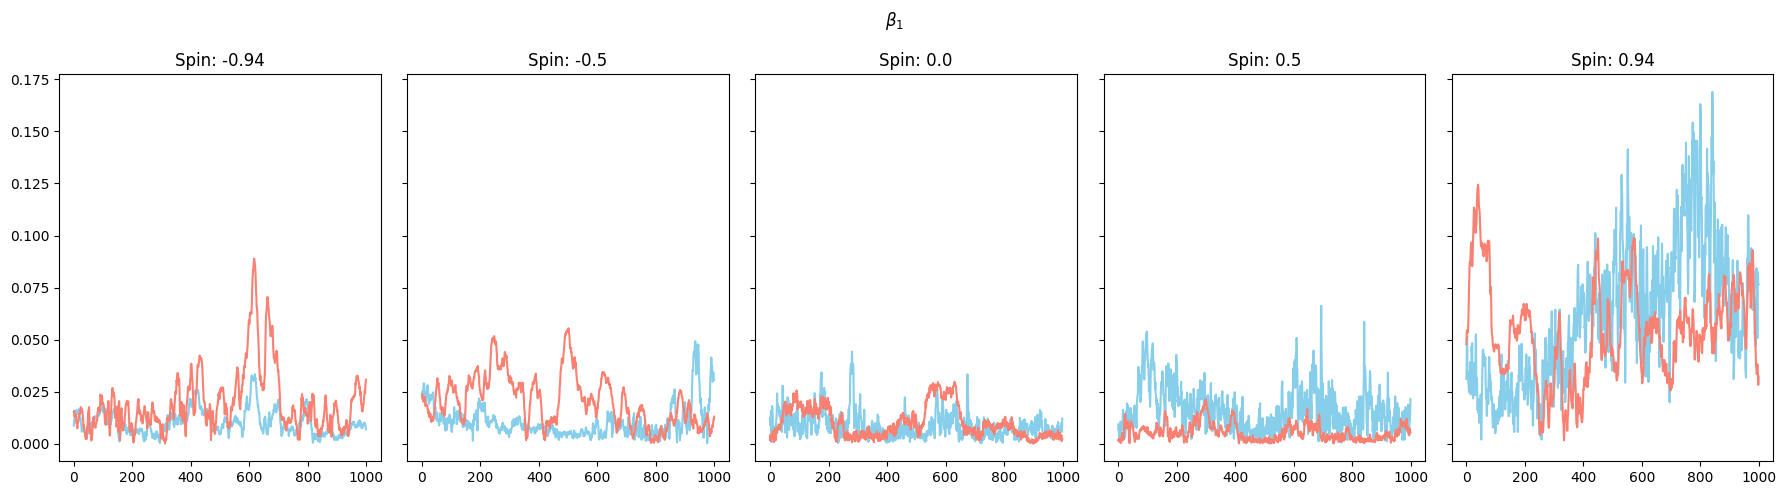

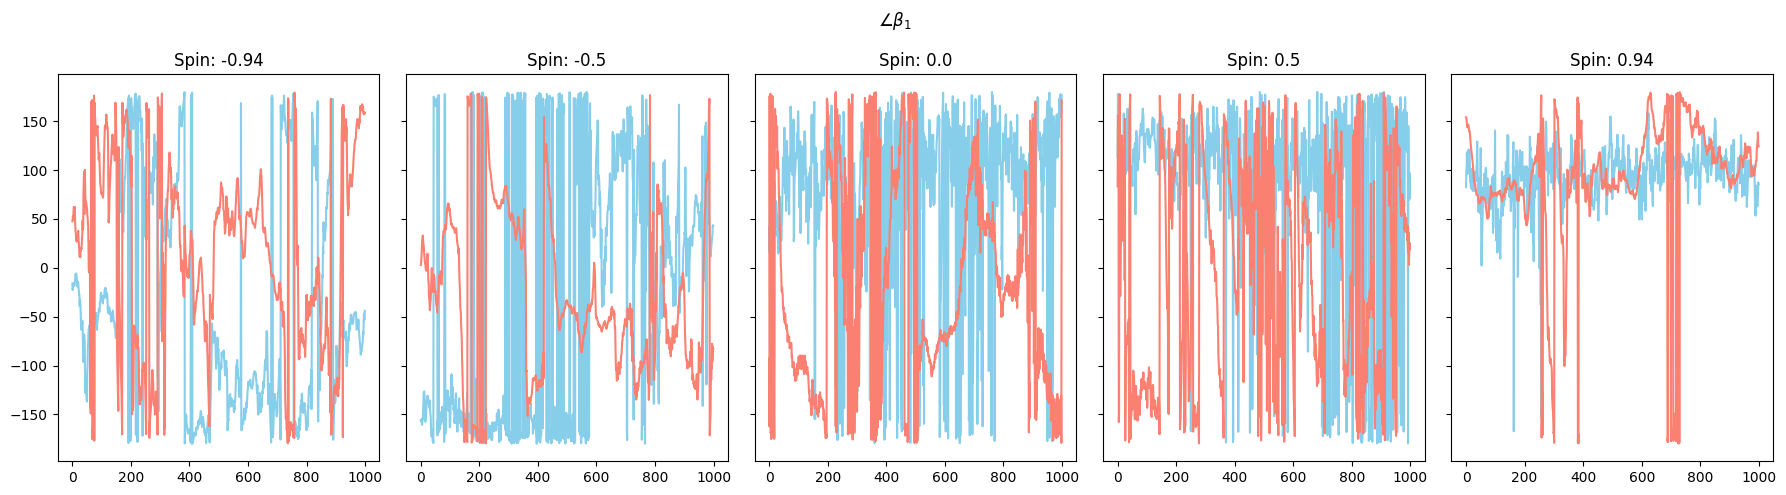

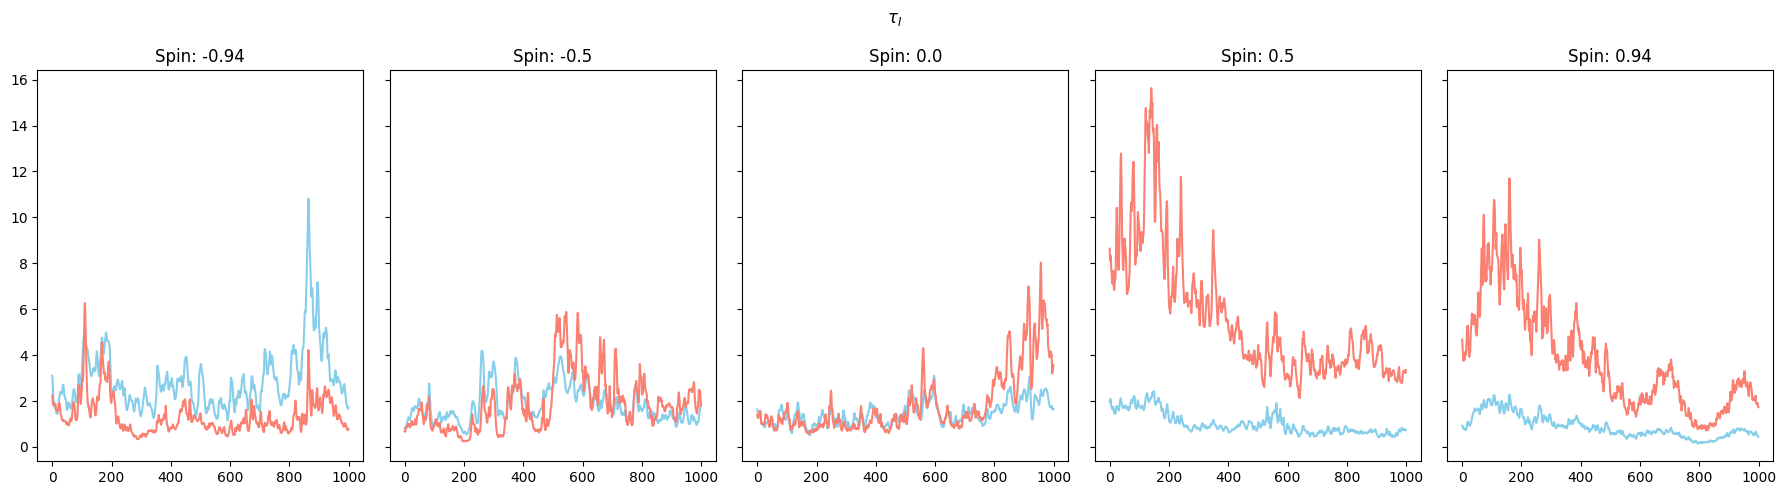

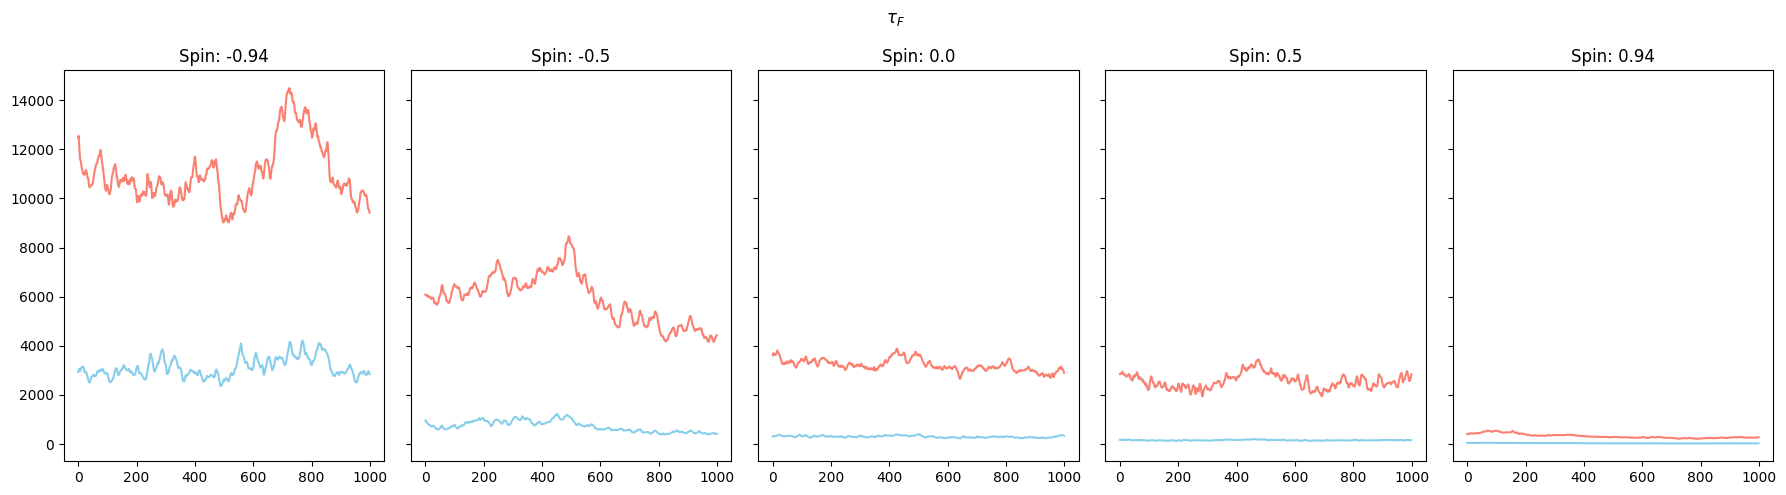

In [69]:
def plot_trend(data1, data2, ax):

    ax.plot(data1, color='skyblue')
    ax.plot(data2, color='salmon')
    
for dist in text_dict:
    vizrow(plot_trend, dist)